## Load data

In [2]:
import mne

from neuracle_lib.readbdfdata import readbdfdata
from tkinter import filedialog
from tkinter import *
import numpy as np
import os
import re

def check_files_format(path):
     filename = []
     pathname = []
     if len(path) == 0:
          raise TypeError('please select valid file')

     elif len(path) == 1:
          (temppathname, tempfilename) = os.path.split(path[0])
          if 'edf' in tempfilename:
               filename.append(tempfilename)
               pathname.append(temppathname)
               return filename, pathname
          elif 'bdf' in tempfilename:
               raise TypeError('unsupport only one neuracle-bdf file')
          else:
               raise TypeError('not support such file format')

     else:
          temp = []
          temppathname = r''
          evtfile = []
          idx = np.zeros((len(path) - 1,))
          for i, ele in enumerate(path):
               (temppathname, tempfilename) = os.path.split(ele)
               if 'data' in tempfilename:
                    temp.append(tempfilename)
                    if len(tempfilename.split('.')) > 2:
                         try:
                              idx[i] = (int(tempfilename.split('.')[1]))
                         except:
                              raise TypeError('no such kind file')
                    else:
                         idx[i] = 0
               elif 'evt' in tempfilename:
                    evtfile.append(tempfilename)

          pathname.append(temppathname)
          datafile = [temp[i] for i in np.argsort(idx)]

          if len(evtfile) == 0:
               raise TypeError('not found evt.bdf file')

          if len(datafile) == 0:
               raise TypeError('not found data.bdf file')
          elif len(datafile) > 1:
               print('current readbdfdata() only support continue one data.bdf ')
               return filename, pathname
          else:
               filename.append(datafile[0])
               filename.append(evtfile[0])
               return filename, pathname

def find_pinyin(file_path):

     # 读取文件（注意指定编码，防止乱码）
     with open(file_path, "r", encoding="gbk") as f:
          text = f.read()
          
     # 用正则匹配 Stimulus: 汉字 (拼音)
     # 匹配模式解释：
     #   Stimulus:\s* 匹配 "Stimulus: " 前缀
     #   .*?\((.*?)\) 捕获括号中的拼音
     pattern = r"Stimulus:\s*.*?\((.*?)\)"

     # 提取所有匹配结果
     pinyins = re.findall(pattern, text)
     return pinyins

In [ ]:
root_path = "/localdata1/liuqi/data/"
path_name_list = ['20251030eeg-language/ck3',
    '20251030eeg-language/ck7',
    '20251030eeg-language/ck8',
    '20251030eeg-language/ck9',
    '20251030eeg-language/ck10',
    '20251030eeg-language/ck11',
    '20251030eeg-language/ck12']

log_path_list = ["20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck3.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck7.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck8.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck9.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck10.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck11.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck12.log",
]
path_name_list = [root_path + path for path in path_name_list]

filename = ['data.bdf', 'evt.bdf']

# (M4)M1 - fix  - M2 - cue - M5 - fix  -M3 -reading - M5 - fix  - M3 -reading - M4(M1)
# (M4)M1 - 1.4S - M2 - 1s  - M5 - 0.8s -M3 - 1.2s   - M5 - 0.8s - M3 - 1.2s   - M4(M1)
from tqdm import tqdm
PINYIN_TEXT   = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
rawData = {pinyin:[] for pinyin in PINYIN_TEXT}
marker_id = 3  # marker 3 对应 读音 刺激

tmin, tmax = 0, 1.2
for n in tqdm(range(len(path_name_list))):
    path_name = path_name_list[n]
    raw = readbdfdata(filename, [path_name])
    print(raw.info["meas_date"])
    raw.load_data()
    # # 去工频（50 Hz）
    # raw.notch_filter(freqs=[50, 100]) 
    # raw.filter(l_freq=0.5, h_freq=40., picks='eeg', fir_design='firwin')
    events, events_id = mne.events_from_annotations(raw)
    # print(events)
    picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False)

    all_epochs = mne.Epochs(raw, events=events, event_id = 3, tmin=tmin, picks=picks,tmax=tmax,baseline=None, preload=True).get_data()
    
    labels = find_pinyin(root_path + log_path_list[n])[:24]
    labels = [x for x in labels for _ in range(2)]

    assert len(labels) == all_epochs.shape[0]
    for i in range(all_epochs.shape[0]):
        rawData[labels[i]].append(all_epochs[i])
        print(labels[i])


  0%|          | 0/7 [00:00<?, ?it/s]

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:11:52+00:00
Reading 0 ... 176999  =      0.000 ...   176.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 14%|█▍        | 1/7 [00:01<00:09,  1.55s/it]

mī
mī
mā
mā
mī
mī
mǐ
mǐ
mā
mā
mī
mī
mí
mí
mì
mì
mí
mí
mà
mà
mì
mì
mì
mì
mí
mí
mǎ
mǎ
má
má
mà
mà
mǐ
mǐ
má
má
mǎ
mǎ
mà
mà
mǎ
mǎ
má
má
mǐ
mǐ
mā
mā
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:33:29+00:00
Reading 0 ... 154999  =      0.000 ...   154.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 29%|██▊       | 2/7 [00:01<00:04,  1.22it/s]

mà
mà
mā
mā
mà
mà
mí
mí
mā
mā
mǎ
mǎ
mī
mī
mǎ
mǎ
mí
mí
mǐ
mǐ
mì
mì
mí
mí
mǐ
mǐ
mī
mī
mà
mà
má
má
mì
mì
mì
mì
mǎ
mǎ
mā
mā
mī
mī
má
má
mǐ
mǐ
má
má
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:36:51+00:00
Reading 0 ... 201999  =      0.000 ...   201.999 secs...


/home/liuqi/workspace/speech_decoding/neuracle_lib/readbdfdata.py:79: RuntimeWarning: Omitted 32 annotation(s) that were outside data range.
  annotationData = mne.io.read_raw_bdf(os.path.join(pathname[0],'evt.bdf'))


Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 43%|████▎     | 3/7 [00:02<00:02,  1.53it/s]

mì
mì
mì
mì
mā
mā
mī
mī
mà
mà
mǐ
mǐ
mí
mí
mǐ
mǐ
mà
mà
mǎ
mǎ
mǐ
mǐ
mà
mà
mā
mā
mí
mí
má
má
má
má
mī
mī
mā
mā
mī
mī
mǎ
mǎ
mí
mí
mì
mì
mǎ
mǎ
má
má
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:40:31+00:00
Reading 0 ... 168999  =      0.000 ...   168.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 57%|█████▋    | 4/7 [00:02<00:01,  1.79it/s]

mí
mí
mǐ
mǐ
mì
mì
mā
mā
mī
mī
mī
mī
má
má
má
má
mà
mà
mā
mā
mì
mì
mà
mà
mì
mì
mǐ
mǐ
mà
mà
mí
mí
má
má
mǎ
mǎ
mí
mí
mǐ
mǐ
mī
mī
mǎ
mǎ
mā
mā
mǎ
mǎ
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:44:12+00:00
Reading 0 ... 162999  =      0.000 ...   162.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 71%|███████▏  | 5/7 [00:03<00:00,  2.03it/s]

mí
mí
mǐ
mǐ
mà
mà
mī
mī
mī
mī
mī
mī
mà
mà
mǎ
mǎ
mā
mā
mǎ
mǎ
mì
mì
mā
mā
mí
mí
mí
mí
má
má
mì
mì
mǐ
mǐ
mā
mā
má
má
mǎ
mǎ
mà
mà
mì
mì
má
má
mǐ
mǐ
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:49:13+00:00
Reading 0 ... 164999  =      0.000 ...   164.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


 86%|████████▌ | 6/7 [00:03<00:00,  2.46it/s]

mā
mā
mī
mī
mǎ
mǎ
mǎ
mǎ
mí
mí
mā
mā
mà
mà
mí
mí
má
má
mì
mì
mí
mí
mì
mì
mā
mā
mǐ
mǐ
má
má
mǐ
mǐ
mī
mī
má
má
mì
mì
mǎ
mǎ
mī
mī
mǐ
mǐ
mà
mà
mà
mà
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
mne version > 0.20
2025-10-30 11:53:55+00:00
Reading 0 ... 167999  =      0.000 ...   167.999 secs...
Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 1201 original time points ...
0 bad epochs dropped


100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

mì
mì
mí
mí
mǐ
mǐ
mǎ
mǎ
mī
mī
mā
mā
mā
mā
mǐ
mǐ
mī
mī
mì
mì
mǐ
mǐ
mà
mà
mā
mā
mà
mà
mí
mí
má
má
mì
mì
mǎ
mǎ
mī
mī
mǎ
mǎ
má
má
mí
mí
mà
mà
má
má


In [4]:
rawData['mā']

[array([[-17973.99777019, -17976.41175845, -17977.66345606, ...,
         -17970.73441569, -17973.86365973, -17974.26599111],
        [-10883.66722367, -10885.90239798, -10885.67888055, ...,
         -10866.36697449, -10868.78096275, -10866.23286404],
        [  6578.27446331,   6575.50284717,   6575.86047506, ...,
           6592.31135799,   6588.51156166,   6585.38231763],
        ...,
        [-30224.40703061, -29938.61764304, -29714.92139786, ...,
         -30640.7753015 , -30570.5908281 , -30313.23285778],
        [-24294.13195217, -23384.32660009, -22589.45391115, ...,
         -26021.51936421, -26307.48756573, -25813.60344968],
        [-74551.89225387, -72443.40762159, -70581.10508806, ...,
         -76899.04879922, -77557.88877951, -76500.69603328]],
       shape=(64, 1201)),
 array([[-17985.93360102, -17983.74313019, -17984.23486854, ...,
         -17977.79756652, -17979.63040946, -17980.25625826],
        [-10871.91020679, -10870.12206734, -10870.74791615, ...,
         -108

In [11]:
data = raw.get_data()  # shape (n_channels, n_times)
print("min:", data.min(), "max:", data.max(), "std:", data.std())
# 通道名
print(raw.ch_names)

# 采样率
print(raw.info['sfreq'])

# 通道类型与单位
for ch in raw.info['chs'][:5]:  # 前5个
    print(ch['ch_name'], ch['unit'], ch['unit_mul'])

min: -375000.0 max: 9359.323046167085 std: 53903.44691864865
['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']
1000.0
Fpz 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp1 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp2 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF3 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF4 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)


(64, 50442)
Data shape: (64, 50442)
EEG channels: 64
Creating RawArray with float64 data, n_channels=64, n_times=50442
    Range : 0 ... 50441 =      0.000 ...    50.441 secs
Ready.
Effective window size : 2.048 (s)


/tmp/ipykernel_477441/1373075578.py:19: RuntimeWarning: DigMontage is only a subset of info. There are 5 channel positions not present in the DigMontage. The channels missing from the montage are:

['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  testRaw.set_montage(montage, match_case=False, on_missing='warn')


Plotting power spectral density (dB=True).


/tmp/ipykernel_477441/1373075578.py:28: UserWarning: Zero value in spectrum for channel HEOR
  testRaw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
/tmp/ipykernel_477441/1373075578.py:28: UserWarning: Infinite value in PSD for channel HEOR.
These channels might be dead.
  testRaw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)


Using matplotlib as 2D backend.


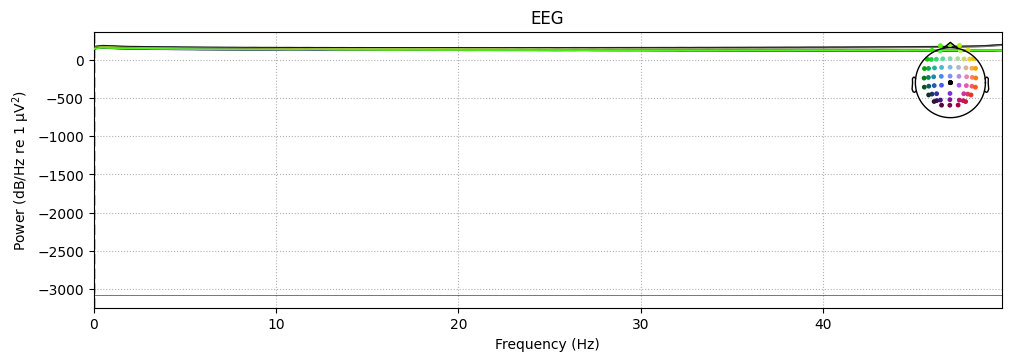

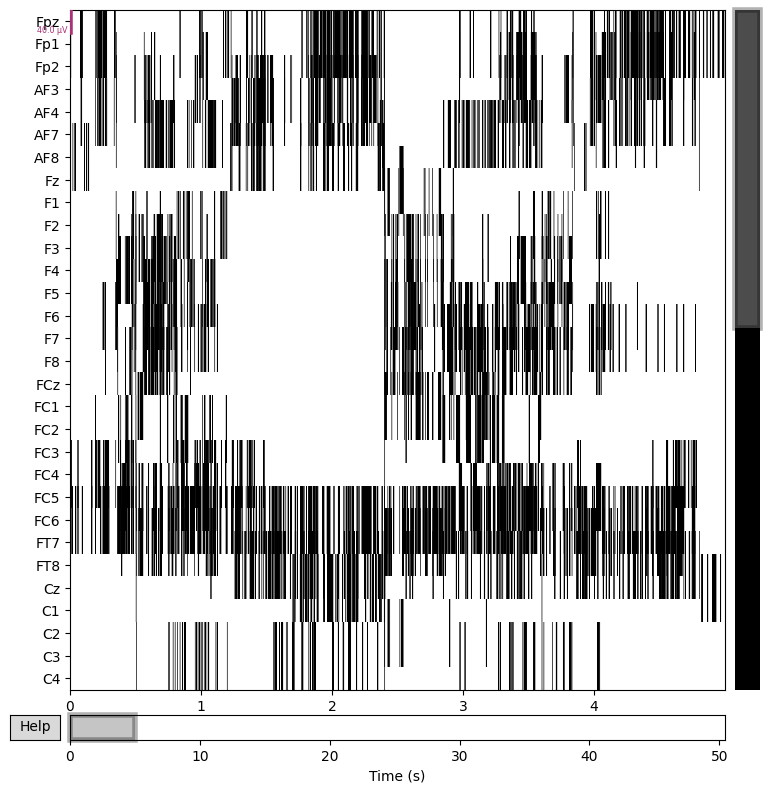

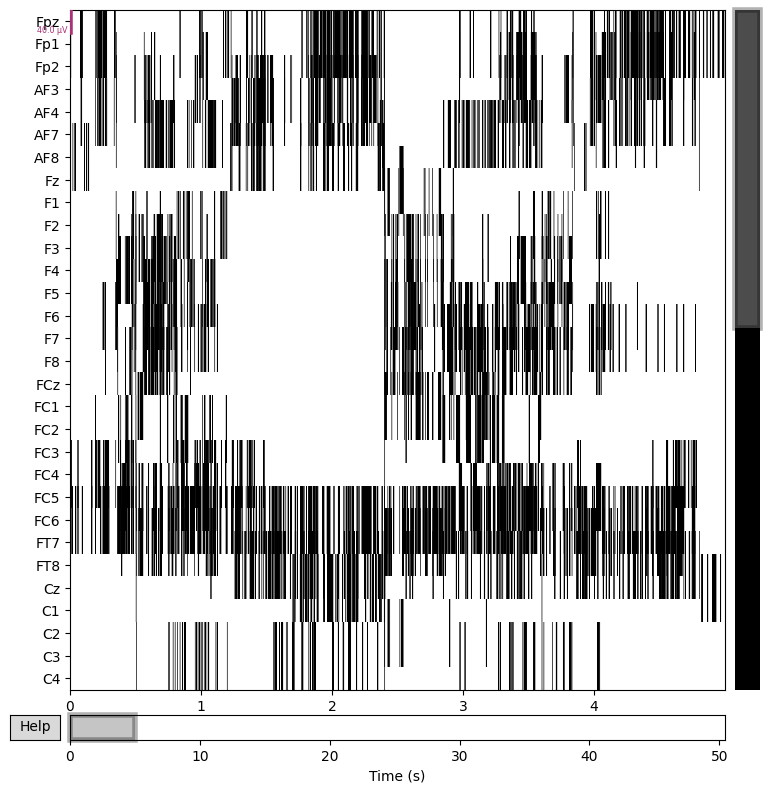

In [5]:
# 取出第一个epoch数据
data = np.hstack(rawData['mā'] ) # shape (n_channels, n_times)
print(data.shape)
print("Data shape:", data.shape)

# 匹配info
info = mne.pick_info(raw.info, mne.pick_types(raw.info, eeg=True))
print("EEG channels:", len(info['ch_names']))

# 检查维度一致性
if data.shape[0] != len(info['ch_names']):
    raise ValueError(f"通道数不匹配: data={data.shape[0]} vs info={len(info['ch_names'])}")

# 构建Raw对象
testRaw = mne.io.RawArray(data, info)

# 设置标准10-20电极位置信息
montage = mne.channels.make_standard_montage('standard_1020')
testRaw.set_montage(montage, match_case=False, on_missing='warn')

# 检查是否有坏道
zero_chs = [ch for ch in testRaw.ch_names if np.allclose(testRaw.get_data(picks=ch), 0)]
if zero_chs:
    testRaw.info['bads'].extend(zero_chs)
    print("检测到坏道:", zero_chs)

# 绘制PSD与原始波形
testRaw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
testRaw.plot(duration=5, n_channels=30)

In [6]:
# save rawData

np.save( 'speech_decoding_epochs.npy',rawData)
print('save done!')

save done!


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------
# 1️⃣ 加载你的数据
# ---------------------------
# 假设 data_dict 的格式为 {class_label: np.ndarray(samples, channels, timepoints)}
# 例如：{1: array(...), 2: array(...)}
data_dict = np.load("speech_decoding_epochs.npy", allow_pickle=True).item()  # 如果你保存成npy
for k in data_dict:
    data_dict[k] = np.array(data_dict[k])
n_channels  =  64
channel_names = raw.info['ch_names']


42
42
42
42
42
42
42
42
Data shape: (336, 76864) Labels: [1 2 3 4 5 6 7 8]


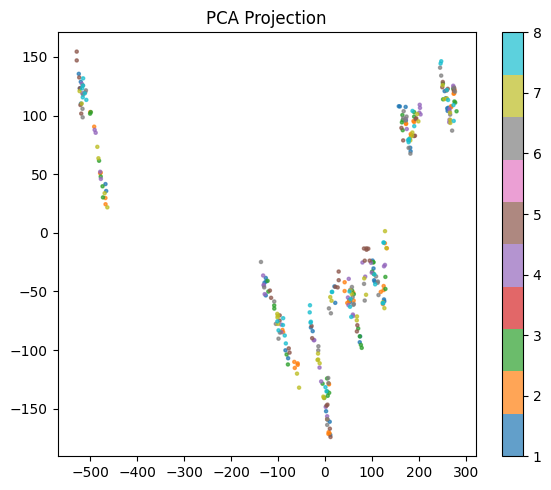

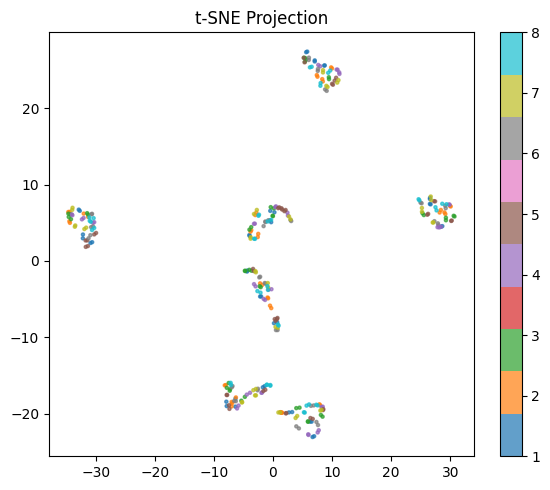

/home/liuqi/.conda/envs/sleep/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/liuqi/.conda/envs/sleep/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


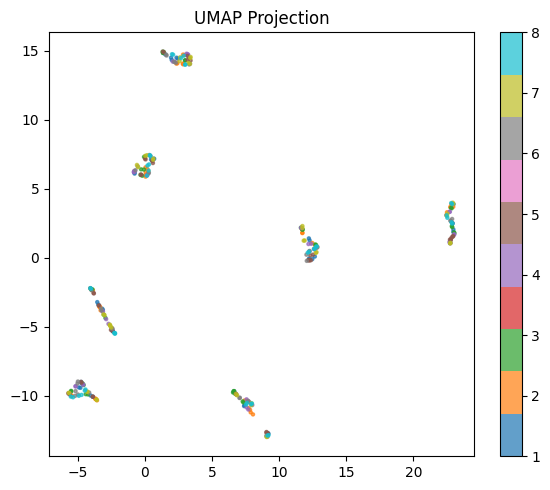

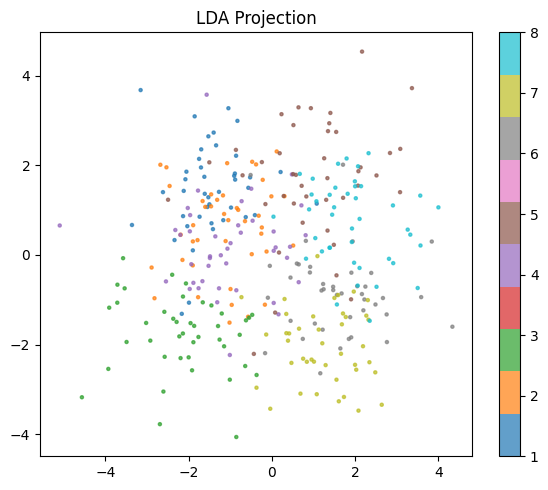


SVM (RBF) Accuracy: 0.0441
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         7
           2      0.176     0.231     0.200        13
           3      0.000     0.000     0.000         9
           4      0.000     0.000     0.000         8
           5      0.000     0.000     0.000         8
           6      0.000     0.000     0.000         4
           7      0.000     0.000     0.000         8
           8      0.000     0.000     0.000        11

    accuracy                          0.044        68
   macro avg      0.022     0.029     0.025        68
weighted avg      0.034     0.044     0.038        68


Random Forest Accuracy: 0.3971
              precision    recall  f1-score   support

           1      0.500     0.286     0.364         7
           2      0.600     0.462     0.522        13
           3      0.400     0.444     0.421         9
           4      0.353     0.750     0.480         8
           5      

/home/liuqi/.conda/envs/sleep/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.2794
              precision    recall  f1-score   support

           1      0.167     0.143     0.154         7
           2      0.429     0.231     0.300        13
           3      0.200     0.222     0.211         9
           4      0.308     0.500     0.381         8
           5      0.333     0.375     0.353         8
           6      0.125     0.250     0.167         4
           7      0.250     0.250     0.250         8
           8      0.429     0.273     0.333        11

    accuracy                          0.279        68
   macro avg      0.280     0.280     0.269        68
weighted avg      0.307     0.279     0.281        68

SVM (RBF) CV mean acc: 0.1369 ± 0.0255
Random Forest CV mean acc: 0.1636 ± 0.0219
KNN CV mean acc: 0.1428 ± 0.0330


KeyboardInterrupt: 

In [8]:

# 构造样本与标签
X_list, y_list = [], []
for label, arr in data_dict.items():
    n_samples = arr.shape[0]
    print(n_samples)
    X_list.append(arr.reshape(n_samples, -1))  # 展开每个样本
    y_list.append(np.full(n_samples, label))

X = np.vstack(X_list)
y = np.concatenate(y_list)

mapping  = {"mā":1, "má":2, "mǎ":3, "mà":4, "mī":5, "mí":6, "mǐ":7, "mì":8}
f = np.vectorize(lambda x: mapping[x])
y = f(y)
print("Data shape:", X.shape, "Labels:", np.unique(y))

# ---------------------------
# 2️⃣ 预处理
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3️⃣ 降维与可视化
# ---------------------------
def plot_embedding(embedding, title, labels):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, "PCA Projection", y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, "t-SNE Projection", y)

# UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, "UMAP Projection", y)

# LDA (必须有标签监督)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plot_embedding(X_lda, "LDA Projection", y)

# ---------------------------
# 4️⃣ 分类性能测试
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "SVM (RBF)": SVC(kernel='rbf', C=1.0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

_acc_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=3))
    _acc_list.append(acc)

# ---------------------------
# 5️⃣ 可选：交叉验证
# ---------------------------
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} CV mean acc: {scores.mean():.4f} ± {scores.std():.4f}")
    

